# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 12)
sns.set_style('white')
sns.set_context('notebook', font_scale=1.2)

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis=1, inplace=True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


**NOTE:** I prefer markdown tables to be left justified, not centered. The code cell below will take care of that.

In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# I want to change the feature name `Detergents_Paper` to `Det_Paper`.
# This will prevent label overlapping in some of the figures below.
data = data.rename(columns={'Detergents_Paper': 'Det_Paper'})

In [4]:
# Display a description of the dataset
data_stats = data.describe()
display(data_stats)

,Fresh,Milk,Grocery,Frozen,Det_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [5]:
indices = [16, 191, 382] # indices for my three samples

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop=True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Det_Paper,Delicatessen
0,1020,8816,12121,134,4508,1080
1,13624,295,1381,890,43,84
2,34454,7435,8469,2540,1711,2893


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.30
* Milk: 5796.27
* Grocery: 7951.28
* Frozen: 3071.93
* Detergents_paper: 2881.49
* Delicatessen: 1524.87

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
+ **Sample 0**: I think this sample might be a **convenience store** at a gas station. This sample has a much lower than average amount spent on fresh products (e.g., produce) and frozen products. Those two categories of items are primarily sold/purchased in grocery stores. But this sample does have significantly higher than average values for milk products, grocery products, detergents and paper. Convenience stores often sell quite a bit of items like milk, ice cream, butter, sodas, chips, snack cakes, bread, laundry and dish soap, envelopes, notebook paper, etc. These are the products marketed toward customers who are willing to pay a little bit more for the convenience of buying a gallon of milk, a 2-liter of soda, and a small bottle of laundry detergent while stopping for gas on the way home from work as oppposed to making a trip to the grocery store. Many of these types of stores also have counters that sell breakfast/lunch/dinner biscuits and sandwiches. That could be the explanation for the nearly average amount spent on delicatessen items. You wouldn't expect a convenience store to purchase as much deli products as a cafe, deli, coffee shop, or grocery store, but it makes sense that they would purchase a non-trivial amount.
+ **Sample 1**: This sample has much lower than average values for milk, detergent, paper, and delicatessen products. The values for grocery and frozen products is also noticeably lower than average. However, this sample spends a higher than average amount on fresh products. I'm not sure if the label "fresh" means primarily produce or does it mean all non-deli, fresh products, which includes butchered meats and fresh seafood. I consider items like packaged meats and cheeses and prepared items (e.g., veggie/cheese trays, sandwiches, lunch meats/cheeses for slicing, etc.) to belong in the "deli". However, items like steaks, pork chops, and fresh seafood might belong to either the "fresh" or "grocery" category. I will assume the "fresh" category includes items like butchered meats and fresh seafood. As such I think this sample might be a small **restaurant** or possibly a **food truck** (e.g., a taco truck) since they are buying mostly fresh produce and fresh meats/seafood with a little bit of grocery and frozen items, but not much else.
+ **Sample 2**: This sample spends much higher than average on fresh, milk, grocery, and delicatessen products. In fact, the amount spent on fresh products is nearly three times the mean. This sample spends a little lower than average on frozen, detergent, and paper products. I think this sample is likely a small **grocery store** or perhaps a **wholesale retailer** who buys from the distributor and then sells the products to other vendors. Due to the relative amounts compared to the previous two samples, I don't think this sample could be a large chain grocery store. This sample certainly seems to dabble in purchasing a non-trivial amount of just about everything the distributor offers, with a heavy emphasis on fresh products. However, I think the relative monetary units would be higher than they are if it were a large grocery store. Therefore, it makes sense to me that this sample is a small (to medium) sized grocery store or some wholesale retailer that passes these products on to grocery stores and/or farmer's market vendors.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

new_data = data.drop('Fresh', axis=1) # copy of the data without the `Fresh` feature
labels = data['Fresh'] # labels for this supervised learning exercise

rs = 1984 # random state for the split and regressor

# Split the data into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(new_data, labels, test_size=0.25, random_state=rs)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=rs, max_depth=4, min_samples_split=10)
regressor.fit(X_train, y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print "The coefficient of determination, R^2, is {}".format(score)

The coefficient of determination, R^2, is 0.121440421252


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:** I attempted to predict `Fresh`. The coefficient of determination is 0.1214, so the other features do a poor job of predicting the value of `Fresh`. Hence, the feature `Fresh` is definitely necessary for identifying customers' spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

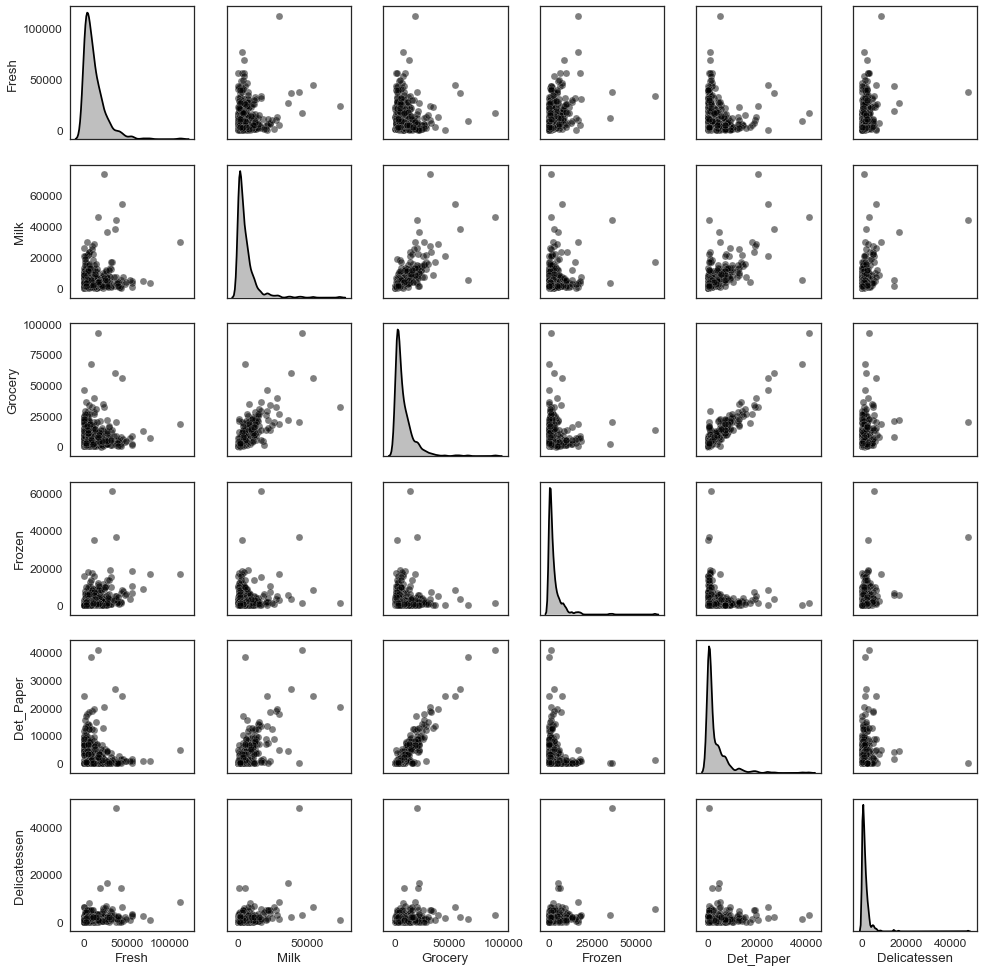

In [7]:
# Produce a scatter matrix for each pair of features in the data
# pd.scatter_matrix(data, alpha=0.25, figsize=(12,12), diagonal='kde', grid=True);
g = sns.PairGrid(data, diag_sharey=False, size=2.3, despine=False);
g.map_offdiag(plt.scatter, alpha=0.5, edgecolor='w', color='k');
g.map_diag(sns.kdeplot, shade=True, color='k');

**Correlations:** A couple of the feature pairs appear to have a non-trivial correlation, but most do not. In the cell below, we compute all feature-pair correlations.

In [8]:
correlations = data.corr()
display(correlations)

,Fresh,Milk,Grocery,Frozen,Det_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Det_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


The two feature-pairs that are worth looking at closer are (`Milk`, `Grocery`) and (`Grocery`, `Det_Paper`). See the two cells below.

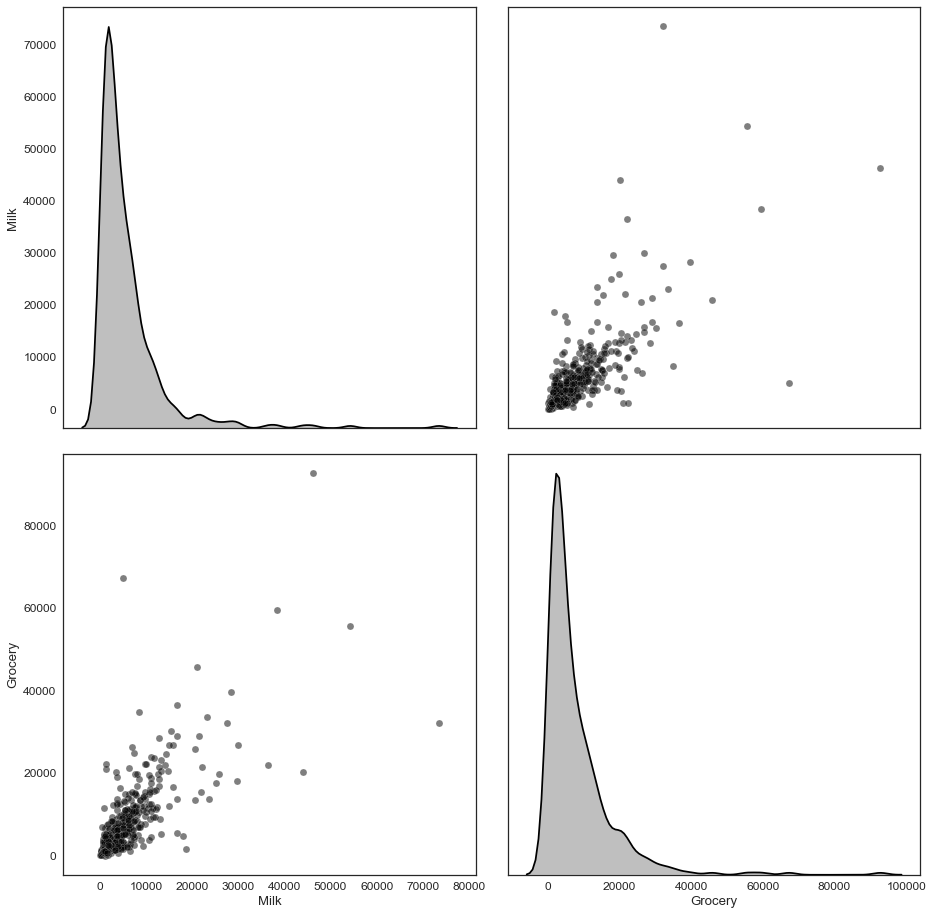

In [9]:
# Produce a scatter matrix for `Milk` and `Grocery`
# pd.scatter_matrix(data[['Milk', 'Grocery']], alpha=0.25, figsize=(12,12), diagonal='kde', grid=True);
g = sns.PairGrid(data, vars=['Milk', 'Grocery'], diag_sharey=False, size=6.5, despine=False);
g.map_offdiag(plt.scatter, alpha=0.5, edgecolor='w', color='k');
g.map_diag(sns.kdeplot, shade=True, color='k');

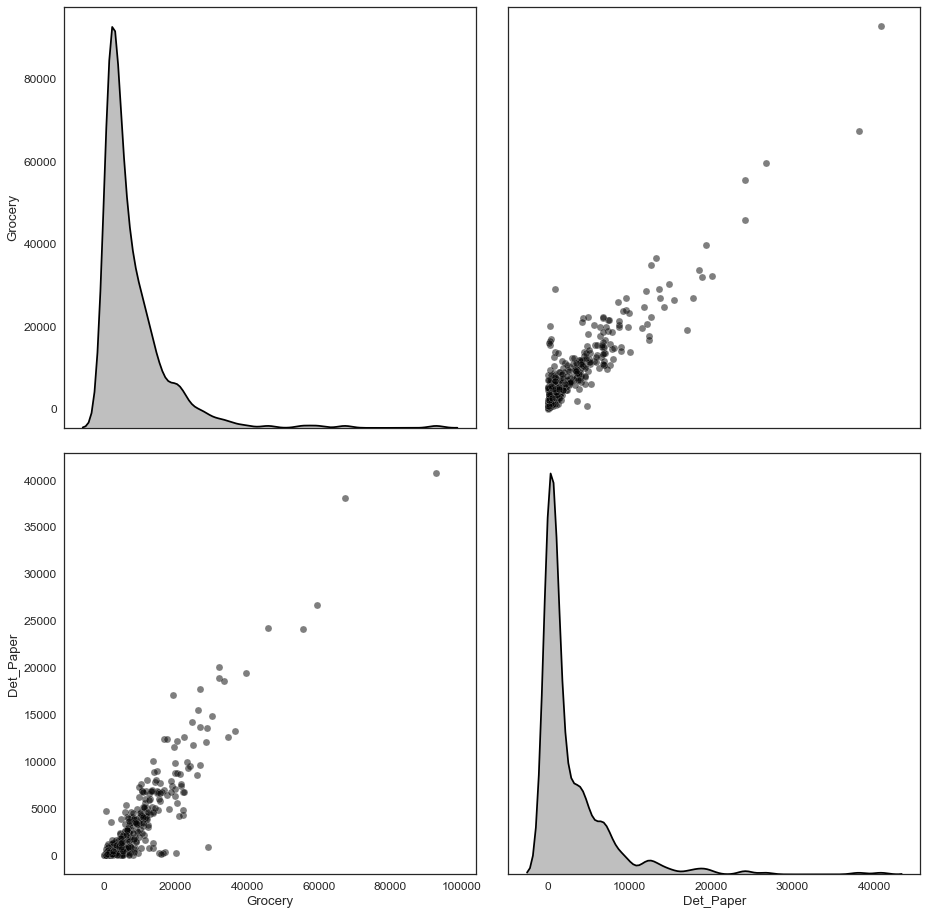

In [10]:
# Produce a scatter matrix for `Grocery` and `Det_Paper`
# pd.scatter_matrix(data[['Grocery', 'Det_Paper']], alpha=0.25, figsize=(12,12), diagonal='kde', grid=True);
g = sns.PairGrid(data, vars=['Grocery', 'Det_Paper'], diag_sharey=False, size=6.5, despine=False);
g.map_offdiag(plt.scatter, alpha=0.5, edgecolor='w', color='k');
g.map_diag(sns.kdeplot, shade=True, color='k');

** Heatmap:** Let's take a look at a heatmap of those correlations. Low correlations will have a red color; high correlations will be dark grey to black.

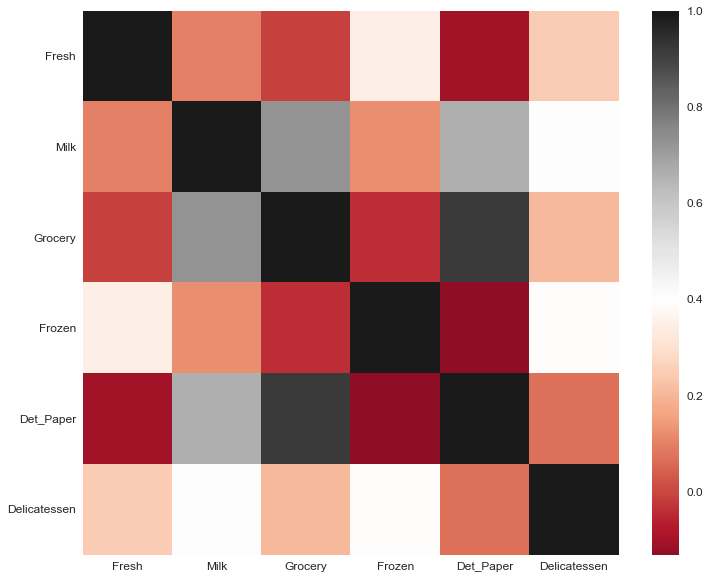

In [11]:
# Produce a heatmap for all of the feature correlations.
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlations, center=0.4, cmap='RdGy', ax=ax);
plt.yticks(rotation=0);

**Normal Test:** Test the data for normality using SciPy Stats. The second value of each tuple is the $p$-value. Extrememly small values imply non-normal data.

In [12]:
data.apply(ss.normaltest)

Fresh             (274.34162662, 2.67591738559e-60)
Milk             (410.653642602, 6.72503458624e-90)
Grocery          (374.023305692, 6.05161258358e-82)
Frozen          (546.903996407, 1.74303502825e-119)
Det_Paper         (371.819932636, 1.8210735948e-81)
Delicatessen    (793.298330417, 5.46331571708e-173)
dtype: object

**Outliers:** Take a look at a boxplot to visualize how the outliers are distributed.

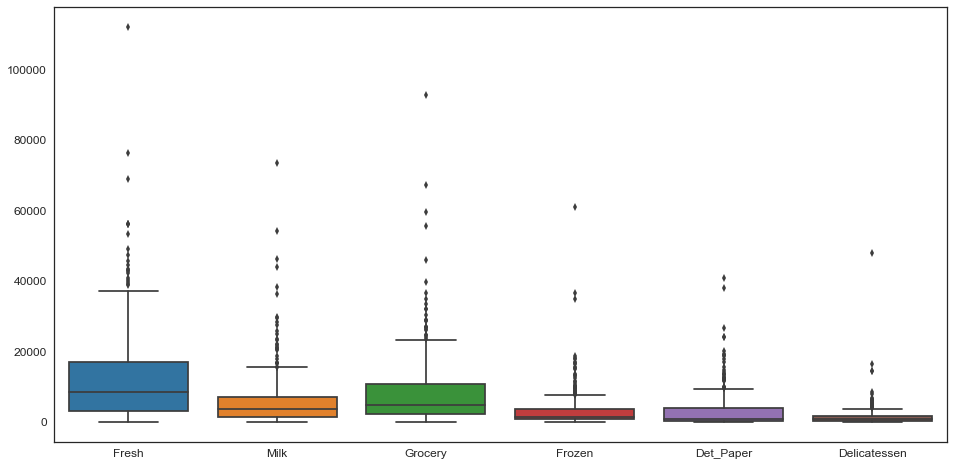

In [13]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=data, ax=ax);

**Note:** I want to count how many outliers each feature has, so I've written the function below.

In [14]:
def count_outliers(df):
    '''
    I must thank `ayhan` on stackoverflow for the logic below. It saved me the time & effort of computing the outlier
    counts using a loop when it's actually a one-liner. I retrieved this idea from stackoverflow on November 25, 2017
    at `https://stackoverflow.com/questions/39068214/how-to-count-outliers-for-all-columns-in-python`.
    '''
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [15]:
num_outliers = count_outliers(data)
print "The number of outliers in each data category:"
display(num_outliers)
print "\n"
print "The proportion of outliers in each data category:"
display(num_outliers/data.shape[0])

The number of outliers in each data category:


Fresh           20
Milk            28
Grocery         24
Frozen          43
Det_Paper       30
Delicatessen    27
dtype: int64



The proportion of outliers in each data category:


Fresh           0.045455
Milk            0.063636
Grocery         0.054545
Frozen          0.097727
Det_Paper       0.068182
Delicatessen    0.061364
dtype: float64

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:** After a quick review of the scatter matrix diagonal, we can see that none of the six data categories have a normal distribution. I verified this by testing the data for normality with `scipy.stats.normaltest()`, which simply performs a hypothesis test on each feature with the null hypothesis being that the feature's data is normal. As one can see in the output above, the $p$-values are tremendously insignificant (indicative of non-normality), with values on the order of $10^{-60}$ to $10^{-173}$. This non-normality might be caused by the data having a natural limit near zero, i.e., no negative monetary units. One way to try and alleviate this issue is using a [Box-Cox power transformation](https://en.wikipedia.org/wiki/Power_transform), as we will do below with $\lambda = 0$. 

All of the feature categories have most of their data concentrated near zero. Nearly all data points fall within the first third to half of the range of the feature's data values, and in two cases (`Frozen`, `Delicatessen`) most data points lie within the first 20-25% of the range. These relatively large ranges are caused by the outliers in the data. I wrote the function `count_outliers()` above to find out how many outliers (i.e., $x_i$ outside $\pm 1.5\cdot$IQR) each feature category has. The results are summarized in the table below. As one can see, outliers are fairly prevalent in the data using the typical definition for outlier. The `Frozen` feature has nearly 1 in 10 data points which qualify as an outlier. I've also made use of `seaborn.boxplot()` above so that we can easily visualize the extent of these outliers for each individual feature.

|Data Category | Number of Outliers | Proportion of all Data |
|:------------:|:------------------:|:----------------------:|
| Fresh        | 20                 | 4.5%                   |
| Milk         | 28                 | 6.4%                   |
| Grocery      | 24                 | 5.5%                   |
| Frozen       | 43                 | 9.8%                   |
| Det_Paper    | 30                 | 6.8%                   |
| Delicatessen | 27                 | 6.1%                   |

Visually, most feature pairs seem to have little correlation, but I computed the correlation coefficients anyway and plotted them in a heatmap using `seaborn.heatmap()`. I will assume that two features have a moderate correlation, $r$, if $0.5\leq |r|<0.7$ and a strong correlation if $|r|\geq 0.7$. Only three of the fifteen feature pairs have a moderate or strong correlation. The features `Milk` and `Det_Paper` have a moderate correlation, whereas the pairs (`Milk`, `Grocery`) and (`Grocery`, `Det_Paper`) both have strong correlations. In fact, with $r=0.925$ for `Grocery` and `Det_Paper`, we might even say that these two features have a very strong correlation. I attempted to predict `Fresh` using the other five features and concluded that they did a very poor job in this regard. My suspicions about the relevance are confirmed; all of the other features are weakly (to very weakly) correlated with `Fresh`. The best of the five pairs (with `Fresh`) has a correlation coefficient of $r=0.35$ (`Frozen`), and the worst of them has the very weak correlation of $r=-0.01$ (`Grocery`). In fact, the correlations between `Fresh` and all of the three features mentioned above that had the highest correlations (i.e., `Milk`, `Grocery`, `Det_Paper`) are 0.10, -0.01, and -0.10.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

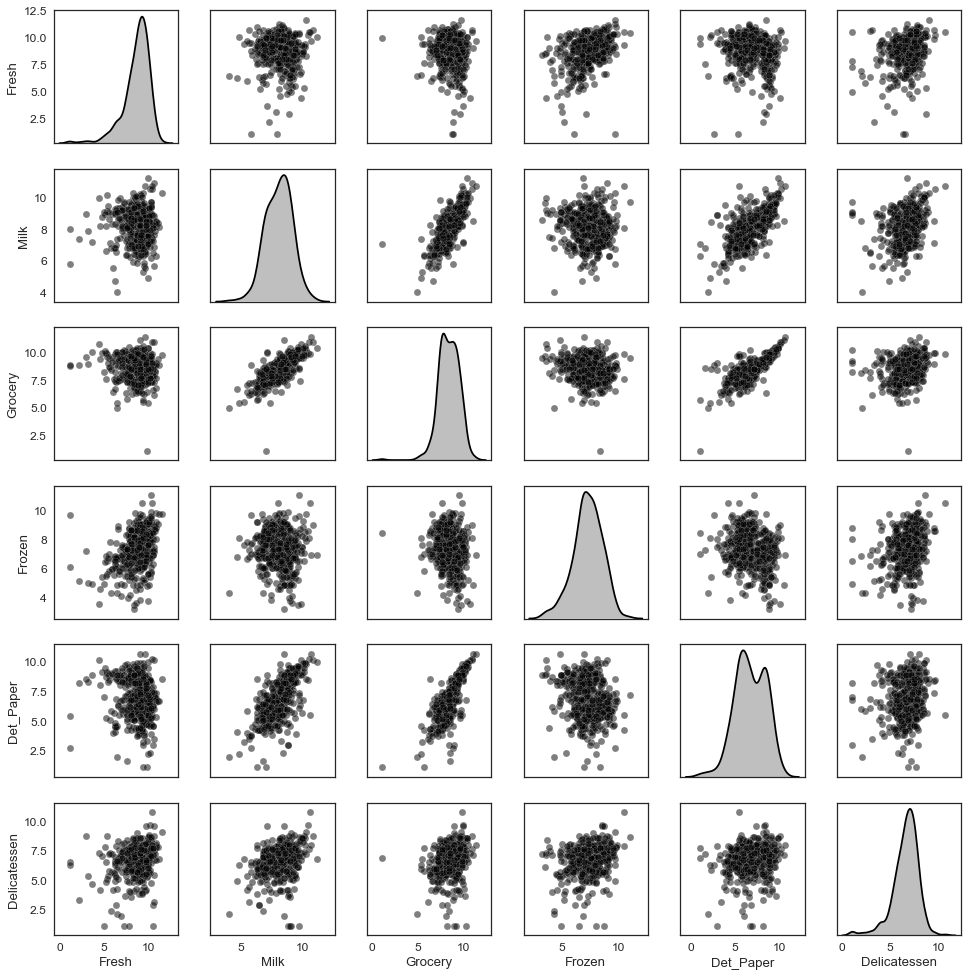

In [16]:
log_data = data.apply(np.log) # Scale the data using the natural logarithm
log_samples = samples.apply(np.log) # Scale the sample data using the natural logarithm

# Produce a scatter matrix for each pair of newly-transformed features
# pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
g = sns.PairGrid(log_data, diag_sharey=False, size=2.3, despine=False);
g.map_offdiag(plt.scatter, alpha=0.5, edgecolor='w', color='k');
g.map_diag(sns.kdeplot, shade=True, color='k');

**Correlations:** Let's take a look at the correlation coefficients of the log-transformed data.

In [17]:
log_correlations = log_data.corr()
display(log_correlations)

,Fresh,Milk,Grocery,Frozen,Det_Paper,Delicatessen
Fresh,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186
Milk,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833
Grocery,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728
Frozen,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718
Det_Paper,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735
Delicatessen,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000


### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [18]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Det_Paper,Delicatessen
0,6.927558,9.084324,9.402695,4.897840,8.413609,6.984716
1,9.519588,5.686975,7.230563,6.791221,3.761200,4.430817
2,10.447380,8.913954,9.044168,7.839919,7.444833,7.970049


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [19]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    Q1 = np.percentile(log_data[feature], 25) # Calculate Q1 (25th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75) # Calculate Q3 (75th percentile of the data) for the given feature    
    step = 1.5 * (Q3 - Q1) # Calculate an outlier step (1.5 times the interquartile range)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Det_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Det_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Det_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Det_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Det_Paper':


,Fresh,Milk,Grocery,Frozen,Det_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Det_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [20]:
# Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:** Five data points are considered outliers for more than one feature. 
+ Data point 65 is an outlier for `Fresh` and `Frozen`.
+ Data point 66 is an outlier for `Fresh` and `Delicatessen`.
+ Data point 75 is an outlier for `Grocery` and `Det_Paper`.
+ Data point 128 is an outlier for `Fresh` and `Delicatessen`.
+ Data point 154 is an outlier for `Milk`, `Grocery`, and `Delicatessen`.

I can think of a few reasons why a data point might be an outlier in multiple categories. The customer might be a much larger business than most other customers. The customer might be a specialty wholesale retailer, i.e., purchase vast quatities of `Fresh` and `Frozen` products and then sell only those products to other businesses. Whatever the reason might be, I think it is reasonable to assume any customer who is an outlier in multiple categories is likely not representative of the data. I don't think leaving these data points in the dataset would be helpful in revealing any underlying structure (if it exists) in the data. 

In addition, K-means clustering is very sensitive to outliers. In general, we know that outliers affect the mean of a dataset more than it affects the median. For example, consider the set `{1, 1, 2, 2, 2, 4, 4, 5, 5, 6, 56}`. Clearly the data value 56 is an outlier. Without it, the mean is 3.2 and the median is 3. With it, the median jumps one unit to 4, but the mean jumps all the way up to 8. So that one data point affected the mean much more than it did the median. Since K-means clustering is a mean-dependent algorithm, naturally it will be the case that outliers might have a significant effect on the resulting clusters. For these reasons, I have chosen to remove all five of the data points mentioned above.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

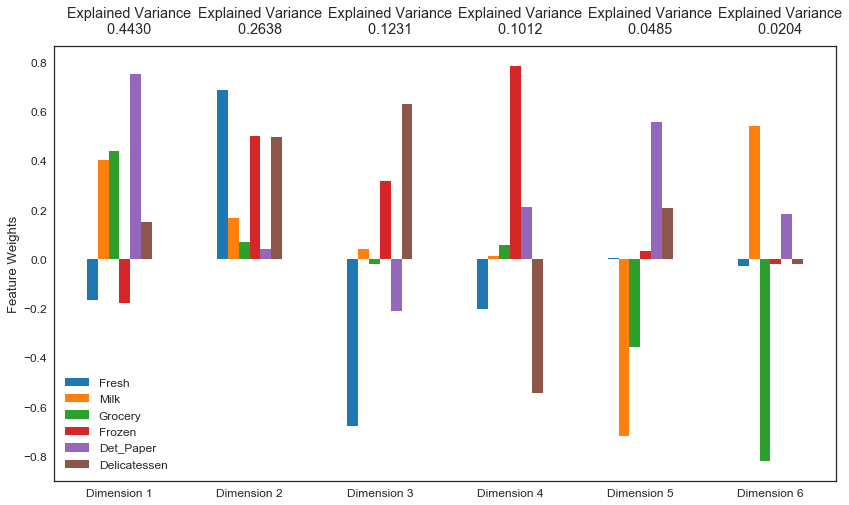

In [21]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA()
pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:** The first two principal components explain 70.68% of the variance. The first four principal components explain 93.11% of the variance.
+ **Dimension 1**: The variance explained ratio for this component is 0.4430. `Milk`, `Grocery`, and `Det_Paper` are best represented in this dimension, all with positive weights of approximately 0.4 or higher. `Det_Paper` is the overall best represented feature with a weight of about 0.75. The `Fresh` and `Frozen` features have small negative weights, and `Delicatessen` has a small positive weight. A positive increase in this PCA dimension corresponds to a large increase in `Det_Paper`, a somewhat large increase in `Milk` and `Grocery`, a small increase in `Delicatessen`, and small decreases in `Fresh` and `Frozen`.
+ **Dimension 2**: The variance explained ratio for this component is 0.2638, making the cumulative variance explained ratio for the first two dimensions 0.7068. `Fresh`, `Frozen`, and `Delicatessen` are best represented in this dimension, all having positive weights greather than 0.45. The other three features all have small positive weights. A positive increase in this PCA dimension corresponds to very small increases in `Milk`, `Grocery`, and `Det_Paper`, but much larger increases in `Fresh` (largest), `Frozen`, and `Delicatessen`.
+ **Dimension 3**: The variance explained ratio for this component is 0.1231, making the cumulative variance explained ratio for the first three dimensions 0.8299. `Fresh` and `Delicatessen` are best represented in this dimension, but with opposite weights. `Fresh` has a large negative weight (around -0.7), and `Delicatessen` has a large positive weight (around 0.65). `Frozen` and `Det_Paper` have medium representations, but in opposite directions again. `Frozen` has a comparitively middle positive weight of about 0.3, and `Det_Paper` has a negative weight of around -0.25. The other two features have insignificant weights. A positive increase in this PCA dimension corresponds to a large decrease in `Fresh`, a large increase in `Delicatessen`, a medium decrease in `Det_Paper`, a medium increase in `Frozen`, a very small increase in `Milk`, and a very small decrease in `Grocery`.
+ **Dimension 4**: The variance explained ratio for this component is 0.1012, making the cumulative variance explained ratio for the first four dimensions 0.9311. `Frozen` is best represented in this dimension with a positive weight near 0.8. `Delicatessen` is also represented relatively well in this dimension with a negative weight of approxmiately -0.55. `Fresh` and `Det_Paper` each are represented modestly with weights -0.2 and 0.2, respectively. The other two features are not represented well at all in this dimension. A positive increase in this PCA dimension corresponds to a large increase in `Frozen`, a fairly large decrease in `Delicatessen`, a moderate decrease in `Fresh`, a moderate increase in `Det_Paper`, and very small increases in `Milk` and `Grocery`.
+ **Dimension 5**: The variance explained ratio for this component is 0.0485, making the cumulative variance explained ratio for the first five dimensions 0.9796. `Milk` and `Det_Paper` are best represented in this dimension with approximate weights -0.7 and 0.55, respectively. `Grocery` has a modest negative weight of -0.35, and `Delicatessen` has a modest positive weight of just over 0.2. `Frozen` has an insignificant weight, and the weight for `Fresh` is imperceptible in the graph. A positive increase in this PCA dimension corresponds to a large decrease in `Milk`, a fairly large increase in `Det_Paper`, a modest decrease in `Grocery`, a modest increase in `Delicatessen`, a very small increase in `Frozen`, and no perceptible change in `Fresh`.
+ **Dimension 6**: The variance explained ratio for this component is 0.0204, making the cumulative variance explained ratio for all six dimensions 1.0000. `Grocery` is very well represented in this dimension with a very large negative weight of almost -0.85. `Milk` is fairly well represented, as well, with a positive weight of nearly 0.55. `Det_Paper` has a small representation less than 0.2, but it is comparitively better represented than the remaining three features which all have very small negative weights. A positive increase in this PCA dimension corresponds to a very large decrease in `Grocery`, a fairly large increase in `Milk`, a small increase in `Det_Paper`, and insignificant decreases in `Fresh`, `Frozen`, and `Delicatessen`.

Based on the details above, we can argue that the first four dimensions are a good representation of customer spending and capture most of the data structure. There are two primary reasons for this. First, more than 93% of the variance in the data is explained by these four PCA components. Secondly, from the detailed individual analyses of the six dimensions, we notice that each of the six original features are represented well in at least one of the first four dimensions: `Fresh` (dimensions 2 and 3), `Milk` (dimension 1), `Grocery` (dimension 1), `Frozen` (dimensions 2 and 4), `Det_Paper` (dimension 1), `Delicatessen` (dimensions 2, 3, and 4). 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [22]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.7939,-2.0377,0.3420,-1.2847,-0.1457,0.1353
1,-4.1718,-1.4932,-1.5318,-0.0817,0.0082,-0.8302
2,0.8744,2.2413,-0.2908,-0.4525,-0.1238,-0.0218


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [23]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [24]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.7939,-2.0377
1,-4.1718,-1.4932
2,0.8744,2.2413


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

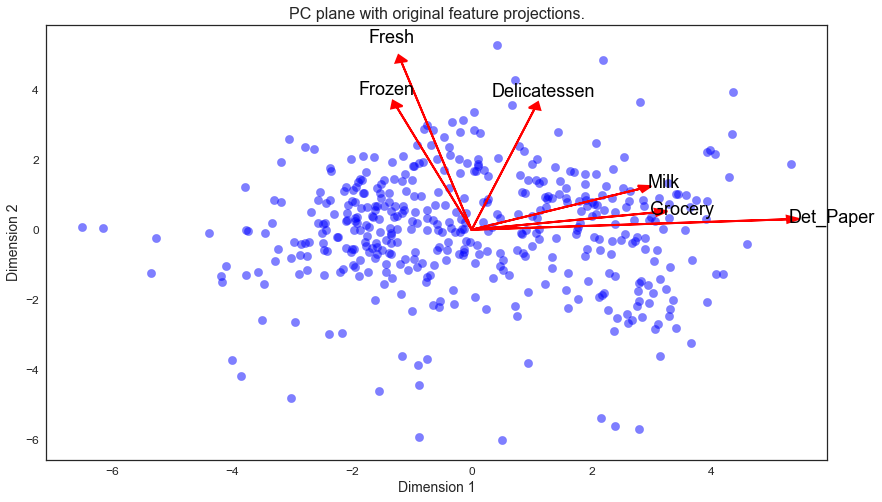

In [25]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca);

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:** The K-means algorithm is easy to implement and runs fast, computationally speaking. It is guaranteed to converge since the algorithm's objective function is monotonically decreasing and bounded below by zero. However, the domain of the objective function for this algorithm is not convex, so the convergence is only guaranteed to be a local minimum, which is why the algorithm is run many times with different initial conditions. The clustering assignments for K-means are hard assignments, so the algorithm concludes with strict assignment labels to the computed clusters. 

The Gaussian Mixture Model (GMM) algorithm yields a soft clustering assignment. This (possibly advantageous) attribute of a GMM means that for each data point, instead of yielding a single cluster assignment, the algorithm yields a collection of weights, $0\leq w_i\leq1$, interpreted as a probability of cluster inclusion. The weights are chosen to maximize a log-liklihood objective function. This objective function is comprised of cluster probabilites, means, and covariance matrices. This algorithm is not guaranteed to converge, but since the problem lies in a probability space it is guaranteed not to diverge. If the algorithm gets stuck, it can be restarted with a new initial condition. Typically, the algorithm concludes when a tolerance threshold is reached. Another advantage of a GMM is the flexibility assigning covariance shapes. Given an initial inspection of the data, one might want to use the same covariance matrix for all components, a different matrix for each component, a different diagonal matrix for each component, or a different spherical covariance for each component. 

Both K-means and GMM have what can be referred to as an "expectation" step and a "maximization" step. The expectation step in GMM is more computationally expensive, so the algorithm typically runs slower. In fact, K-means is often used as an initialization step for GMM instead of initializing the mixture model randomly.

I am going to use K-means for our dataset. The main reason is that I want hard cluster assignments. The goal is to use unsupervised learning to compute clusters and then train a learning algorithm to predict cluster assignment for new data based on values of the features.

**Reference:** D. Rosenberg, New York University. *K-Means and Gaussian Mixture Models*. Presentation dated June 15, 2015. Retrieved November 30, 2017 from [https://davidrosenberg.github.io/ml2015/docs/13.mixture-models.pdf](https://davidrosenberg.github.io/ml2015/docs/13.mixture-models.pdf).

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def cluster_pipe(df, df_samples, max_clusters=2, rs=0):
    """
    This function computes the clusters and corresponding silhouette scores for a range of cluster numbers.
    The function returns the number of clusters that resulted in the highest silhouette score.
    """
    top_score = -2
    for n in range(2, (max_clusters + 1)):
        clusterer = KMeans(n_clusters=n, random_state=rs)
        clusterer.fit(df)
        preds = clusterer.predict(df)
        centers = clusterer.cluster_centers_
        sample_preds = clusterer.predict(df_samples)
        score = silhouette_score(df, preds)
        print "The silhouette score for {} clusters is {}".format(n, score)
        if score > top_score:
            best_clusterer = n
            top_score = score
    return best_clusterer

In [27]:
random_state = 1984 # random state for the K-Means cluster algorithm
n_clusters = cluster_pipe(reduced_data, pca_samples, max_clusters=10, rs=random_state) # optimal number of clusters
clusterer = KMeans(n_clusters=n_clusters, random_state=random_state) # create K-Means cluster object
clusterer.fit(reduced_data) # fit the reduced-dimension data
preds = clusterer.predict(reduced_data) # predict the cluster assignments for all data
centers = clusterer.cluster_centers_ # retrieve the cluster centers
sample_preds = clusterer.predict(pca_samples) # predict the cluster assignments for the sample data
score = silhouette_score(reduced_data, preds) # compute the silhouette score for the optimal clusterer

The silhouette score for 2 clusters is 0.426281015469
The silhouette score for 3 clusters is 0.397138208845
The silhouette score for 4 clusters is 0.331195584161
The silhouette score for 5 clusters is 0.349997797526
The silhouette score for 6 clusters is 0.36152167986
The silhouette score for 7 clusters is 0.364241916099
The silhouette score for 8 clusters is 0.351943139387
The silhouette score for 9 clusters is 0.355766714532
The silhouette score for 10 clusters is 0.349202528938


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:** The silhouette scores are summarized in the table below. Using two clusters yields the best score.

|Number of Clusters | Silhouette Score |
|:-----------------:|:----------------:|
| 2                 | 0.4263           |
| 3                 | 0.3971           |
| 4                 | 0.3312           |
| 5                 | 0.3500           |
| 6                 | 0.3615           |
| 7                 | 0.3642           |
| 8                 | 0.3519           |
| 9                 | 0.3558           |
| 10                | 0.3492           |

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

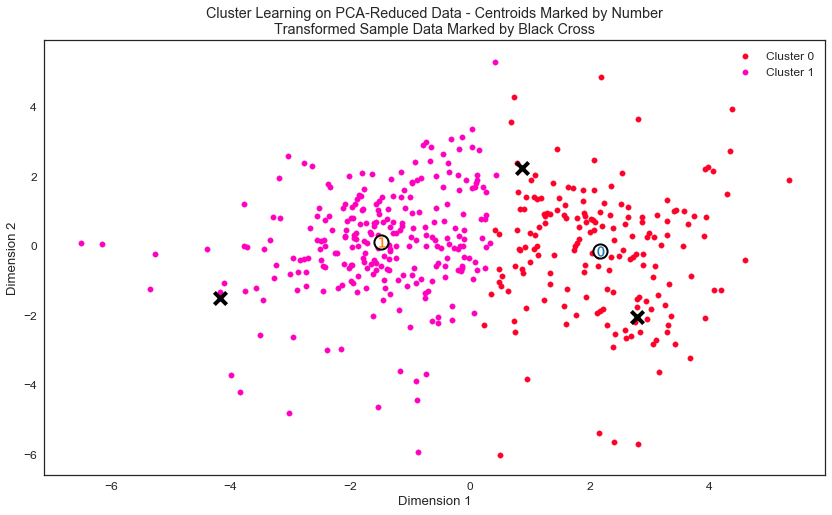

In [28]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [29]:
log_centers = pca.inverse_transform(centers) # Inverse transform the centers
true_centers = np.exp(log_centers) # Exponentiate the centers

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Det_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:** For reference, the mean feature values calculated above are summarized in the table below.

|Feature       | Mean    |
|:------------:| -------:|
| Fresh        | 12000.3 |
| Milk         | 5796.3  |
| Grocery      | 7951.3  |
| Frozen       | 3071.9  |
| Det_Paper  | 2881.5  |
| Delicatessen | 1524.9  |

+ **Segment 0**: This segment buys much less than average `Fresh` and `Frozen`, and just a little less than average `Delicatessen`. It also buys much more than average `Milk`, `Grocery`, and `Det_Paper`. These very high values for `Milk`, `Grocery`, and `Det_Paper` indicate to me that this segment likely represents retail establishments that specialize in things like groceries, soaps, cleaning supplies, paper plates, milk, butter, cheeses, etc. In other words, this segment seems to represent customers that are very similar to **grocery stores**.

+ **Segment 1**: This segment actually buys less than average in all six categories, so to make some kind of useful inference I want to look at comparative ratios. The ratio of `Fresh` to `Milk` for the means is 2.1, but for this segment that ratio is 4.7. The ratio of `Fresh` to `Grocery` for the means is 1.5, but for this segment that ratio is 3.6. The ratio of `Fresh` to `Det_Paper` for the means is 4.2, but for this segment that ratio is 30.2. Despite the fact that this segment has all six values less than the means, these ratios are quite informative. This segment is representative of establishments that buy much more fresh products (produce, butchered meats, fresh seafood) than things like cereal, pasta, processed foods, milk, and dish soap when compared to the "average" customer. In fact, the last ratio comparison is very telling. There is one type of establishment that needs a little bit of detergent to wash dishes, but requires vastly more fresh products to remain profitable. I believe this segment represents **restaurants**.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [30]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:** I labeled Sample 0 as a convenience store, so it is best represented by Segment 0. I labeled Sample 1 as a restaurant or food truck, so it is best represented by Segment 1. I labeled Sample 2 as a grocery store or wholesale retailer, so it is best represented by Segment 0. As shown above, the predictions are consistent with these representations.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** Presumably the modification of the delivery schedule does not impose a costly, logistical challege for the distributor to implement. They simply need to deliver only three days per week instead of five. This is an important distinction, because if doing an experimental test of a service modification was prohibitively expensive, then the distributor might consider an email survey. The problem with that is the uncertainty associated with survey response rates; lack of response is not necessarily indicative of approval or disapproval one way or the other. The distributor needs actual sample data with responses of approval or disapproval to the actual service modification.

The distribtor already has the customer segmentation results above and knows how many customers are in each segment. They do not need to conduct a test using all customers, only a representative sample. Thirty randomly (uniformly) selected customers from each segment are a minimum, but fifty from each segment would be better. Asking for volunteers from customers to participate in a "trial" delivery modification would not be the right way to go. Customers who are skeptical would never go for it, so you probably would not get a sample that is representative of the data and uniformly distributed. The best way to go is to randomly select the 100 customers (50 uniformly distributed from each segment) and inform them that your distribution company is changing its delivery schedule from five days per week to three days per week. You might get complaints right away, or maybe not at all, but that is the point of the experiment.

Obviously, you cannot allow the experiment to continue indefinitely. For customers who are not supportive of the modification, one or two weeks of inconvenience probably isn't enough incentive to drop you as a distributor and go through the hassle of finding a new one. At the end of the one (or two) week test, ask each of the participants if they prefer the new delivery schedule over the previous one. This is where the actual statistical A/B test begins. We will let Variant A be status quo, so that Variant B is the modified (three day per week) delivery schedule. The proportion of each customer segment sample that prefers Variant B is computed. Depending on the values that you get, there are a number of hypothesis tests that might be appropriate to determine if any differences in the proportions are statistically significant or due to random chance. The table below presents some possibilities. Let $p_0$ be the true proportion of Segment 0 customers that prefer Variant B, and let $p_1$ be the true proportion of Segment 1 customers that prefer Variant B.

|Test Number | Null Hypothesis | Alternative Hypothesis |
|:----------:|:----------------|:-----------------------|
| 1          | $p_0 = 0$       | $p_0 > 0$              |
| 2          | $p_0 = 1$       | $p_0 < 1$              |
| 3          | $p_1 = 0$       | $p_1 > 0$              |
| 4          | $p_1 = 1$       | $p_1 < 1$              |
| 5          | $p_0 - p_1 = 0$ | $p_0 - p_1 \neq 0$     |

For each of the hypothesis tests that you perform, you probably want to consider a couple of significance levels, e.g., 1% and 5%. It might not be the case that you find out any actionable information from this A/B test. If 25% of the Segment 0 samples and 45% of the Segment 1 samples prefer Variant B, then it might be the case that the customer segmentation you have performed is not a useful indicator of whether or not a customer would prefer five or three deliveries per week. 

If I were doing this, I would hope that the results clearly indicated a preference. For example, customers in Segment 0 prefer deliveries five days per week, and customers in Segment 1 prefer deliveries three days per week. Of course, one doesn't have to be so strict with the null hypothesis being either zero or one. You might be okay modifying the delivery service of a segment if only 95% or 90% (or perhaps 80%) of a customer segment preferred one variant over the other. For example, you might set up your hypothesis test with the null hypothesis $p_0 = 0.9$ and the alternative hypothesis $p_0 < 0.9$. When you collect your data from the A/B test you might find that 86% of Segment 0 preferred Variant B. Although 0.86 is less than 0.9, that difference could be due to random chance given some acceptable significance level. That is precisely what the hypothesis testing will reveal.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** The binary customer segment data determined above will make a great label (target variable) for a supervised learner. In other words, each data point would consist of six values for the features `Fresh`, `Milk`, `Grocery`, `Frozen`, `Det_Paper`, `Delicatessen`, and then either a 0 or a 1 indicating which Segment that data point belonged to. The data may then be split along with the corresponding labels into training and testing sets. At that point, an appropriate supervised learner could be implemented. I would try to use either a Decision Tree or a Support Vector Machine, or both. I would tune the parameters using `GridSearchCV()` to optimize the accuracy of the learner. Once the learner has been optimized, the distributor may simply apply the chosen learner's prediction method to the ten new customer data estimates.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

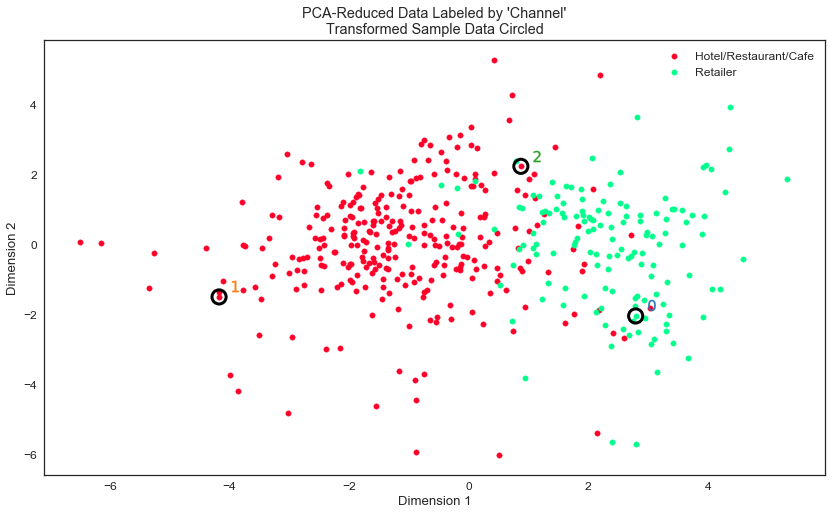

In [31]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:** The clustering algorithm above compares brilliantly with this disribution of `Hotel/Restaurant/Cafe` to `Retailer` customers. I chose two clusters, and obviously this graph has two clusters. One does notice anomalies in this distribution, meaning a few `Hotel/Restaurant/Cafe` customers are dispersed among the `Retailer` customers and vice versa. But overall, this graph appears to be very close to the one generated above by the clustering algorithm. Clearly it is the case that Segment 0 would be classified as `Retailers` and Segment 1 would be classified as `Hotel/Restaurant/Cafe`. In **Question 8** I labeled Segment 0 as grocery stores and Segment 1 as restaurants. I would say that these new classifications based on the `Channel` feature data are most definitely consistent with my previous definitions. I would point out one discrepancy regarding both my own intuition and the customer segments. After graphing the results of the clustering algorithm, I noticed that one of my three original samples was in the heart of Segment 0, one was in the heart of Segment 1, and by chance one was very close to the boundary of the two segments. It was my sample number 2. In **Question 1** my intuition led me to identify this customer as a grocery store or wholesale retailer. Moreover, the clustering algorithm agreed and was consistent with my intuition regarding this customer, placing it clearly in Segment 0 (`Retailers`), albeit close to the boundary. However, when graphed using the `Channel` data we see that, in fact, this customer was not a retailer. More than likely, the customer is either a large restaurant or a hotel.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.